# 7 - Data Visualizations and Plotting
Visualization of data is a useful tool for better understanding of a data set. By using graphs such as scatter plots or histograms one can create a visual representation of numerical information. This visual representation may help in understanding an abstract data relationship or discovering new insights. This section shows how to create various types of visualizations such as curves and image plots in both R and Python. It also covers some of the important packages/modules needed to create such visualizations.

## 7.1 - R Plots and ggplot2 Package
R has built-in functions for basic plotting needs such as `plot()`, `hist()`, `points()`, and many others. These functions do not require additional packages and can be used directly in an R script or console. For more advanced plotting options one can install and load the ggplot2 package. The ggplot2 package is a system for declaratively creating graphics. It is now over 10 years old and is used by hundreds of thousands of people to make plots. The ggplot2 documentation page [[14] ggplot2: Elegant Graphics for Data Analysis](#ref14) serves as a great resource with information on installation and usage, and also provides a helpful cheat sheet. As described by the online reference in [[14]](#ref14) "ggplot2 is a system for declaratively creating graphics, based on The Grammar of Graphics. You provide the data, tell ggplot2 how to map variables to aesthetics, what graphical primitives to use, and it takes care of the details."   

Additionally, the R package 'gridExtra' is used in combination with ggplot2. As per the gridExtra documentation page [[15] gridExtra: Miscellaneous Functions for "Grid" Graphics](#ref15), it "provides a number of user-level functions to work with "grid" graphics, notably to arrange multiple grid-based plots on a page, and draw tables." It is simply used here to display two ggplot2 plots side by side. Normally this can be done with the built-in R function `par()` but the ggplot2 graphics are not compatible with this call.   

The packages can be loaded into R using the calls `library(ggplot2)` and `library(gridExtra)` if already installed. If not installed one can download a version using the calls `install.packages(ggplot2)` and `install.packages(gridExtra)`. It should be noted that version 3.3.2 of ggplot2 and version 2.3 of gridExtra are being used.

In [2]:
library(ggplot2)
packageVersion("ggplot2")

[1] ‘3.3.2’

In [3]:
library(gridExtra)
packageVersion("gridExtra")

[1] ‘2.3’

In [4]:
import numpy as np
import matplotlib

## 7.2 - Python Matplotlib Module 
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is very easy to use and has tools for advanced visualization as well as all your basic needs. A warning for English speaking non-Americans: unfortunately Matplotlib does not know what "colour" is and you must use "color" to refer to this parameter.

We will make use of the pyplot and image tools within matplotlib. As described in the matplotlib documentation [[16] Matplotlib: A 2D Graphics Environment](#ref16) "pyplot is a state-based interface to matplotlib. It provides an implicit, MATLAB-like, way of plotting. It also opens figures on your screen, and acts as the figure GUI manager. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation." The image module within matplotlib supports basic image loading, rescaling and display operations. It is used here simply to load a saved jpeg image.   

Both of these modules can be imported separately from matplotlib with the calls `import matplotlib.pyplot` and `import matplotlib.image`. Here we choose to import these under the names of `plt` and `mpimg` respectively. It should be noted that version 3.3.2 of matplotlib is being used.

In [5]:
import matplotlib.pyplot as plt  # Plotting
import matplotlib.image as mpimg # Reading images
print(matplotlib.__version__)

3.5.3


## 7.3 - Scatter Plots 
Typically scatter plots are used to explore the relationship between two numeric variables by plotting points on a Cartesian coordinate system.
### 7.3.1 - Matplotlib Scatter Plots 
Scatter plots can be created with the `scatter()` function which includes multiple plotting parameters such as point style, colour, size, and transparency. The Matplotlib documentation page [[16]](#ref16) for scatter plots has a few important notes:
1) The plot function will be faster for scatterplots where markers don't vary in size or colour.
2) Any or all of x, y, s, and c may be masked arrays, in which case all masks will be combined and only unmasked points will be plotted.
3) Fundamentally, scatter works with 1D arrays; x, y, s, and c may be input as N-D arrays, but within scatter they will be flattened. The exception is c, which will be flattened only if its size matches the size of x and y.   

Here we plot some 2-dimensional Gaussian $N(0,1)$ data, generated using the NumPy `random()` function.

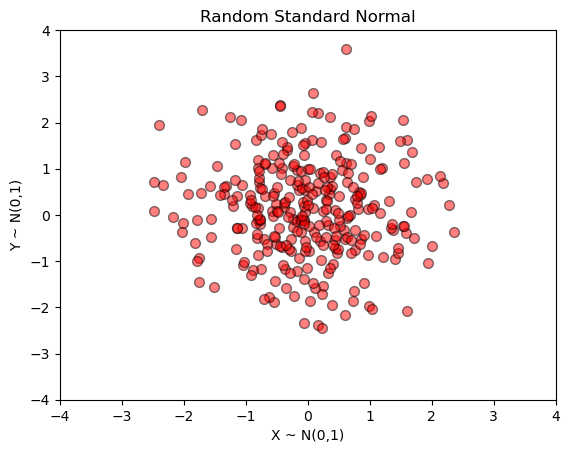

In [6]:
data = np.random.normal(size = (2,300)) # Random Gaussian data for plotting

plt.scatter(x = data[0],         # x axis
            y = data[1],         # y axis
            marker = 'o',        # default point style is a circle 'o', many options are
                                 # availible 'o':cricle, 'v':triangle down, '^':triangle up,...
            s = 50,              # point size, default is (rcParams['lines.markersize'])^2
            c = "red",           # point colour, default is blue
            alpha = 0.5,         # alpha shading transparncey of points, default is solid colour
            edgecolor = "black", # colour of point edges, default is same as point colour
            linewidths = 1)      # width of point edges, default is 1.5

plt.xlabel("X ~ N(0,1)")            # add x axis label
plt.ylabel("Y ~ N(0,1)")            # add y axis label
plt.title("Random Standard Normal") # add plot title
plt.xlim([-4, 4])                   # limits of x axis
plt.ylim([-4, 4])                   # limits of y axis
plt.show()                          # to display nicely

It should be noted that some of the plotting parameters can be "vectorized" to give individual data points any desired appearance. One can create 2 separate groups visually by adjusting the plotting parameters in vector form.

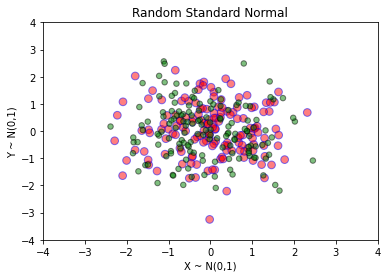

In [7]:
# Vectorize plotting parameters into two groups
sizes = [60]*150 + [30]*150
colours = ['red']*150 + ['green']*150
edgecolor = ['blue']*150 + ['black']*150

plt.scatter(x = data[0],           # x axis
            y = data[1],           # y axis
            marker = 'o',          # point style  
            s = sizes,             # point size vectorized
            c = colours,           # point colour vectorized
            alpha = 0.5,           # alpha shading transparncey
            edgecolor = edgecolor, # colour of point edges vectorized
            linewidths = 1)        # width of point edges

plt.xlabel("X ~ N(0,1)")            # x axis label
plt.ylabel("Y ~ N(0,1)")            # y axis label
plt.title("Random Standard Normal") # plot title
plt.xlim([-4, 4])                   # limits of x axis
plt.ylim([-4, 4])                   # limits of y axis
plt.show()                          # display

Instead of vectorizing the plotting parameters one can "stack" the plots on top of each other. One can plot each group of points one at a time each with different plotting parameters. Obviously the order in which one choose to stack the plots will affect the layering of points. Stacking plots allows for a legend to be created since one can assign a label to each plot call.

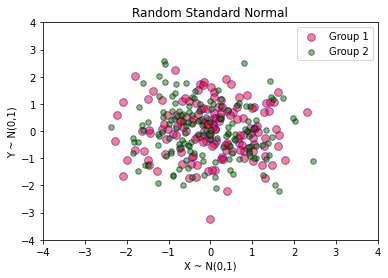

In [8]:
data_group1 = data[:,0:150]   # first group of data
data_group2 = data[:,150:300] # second group of data

plt.scatter(x = data_group1[0], # plot first group
            y = data_group1[1],          
            marker = 'o',
            s = 60,
            c = "red",
            alpha = 0.5,
            edgecolor = "blue",
            linewidths = 1,
            label = "Group 1")  # legend label

plt.scatter(x = data_group2[0], # stack plot of second group
            y = data_group2[1],
            marker = 'o', 
            c = "green",
            edgecolor = "black",
            s = 30,
            alpha = 0.5,
            linewidths = 1,
            label = "Group 2")  # legend label

plt.xlabel("X ~ N(0,1)")            # x axis label
plt.ylabel("Y ~ N(0,1)")            # y axis label
plt.title("Random Standard Normal") # plot title
plt.xlim([-4, 4])                   # limits of x axis
plt.ylim([-4, 4])                   # limits of y axis
plt.legend()                        # display legend
plt.show()                          # display

One can observe that the two matplotlib plotting methods produce virtually identical results.

### 7.3.2 - R Scatter Plots 
R scatter plots can be produced using the built-in `plot()` function as long as the `pch` parameter is specified to display points. One can notice the extreme similarity to the matplotlib functions.

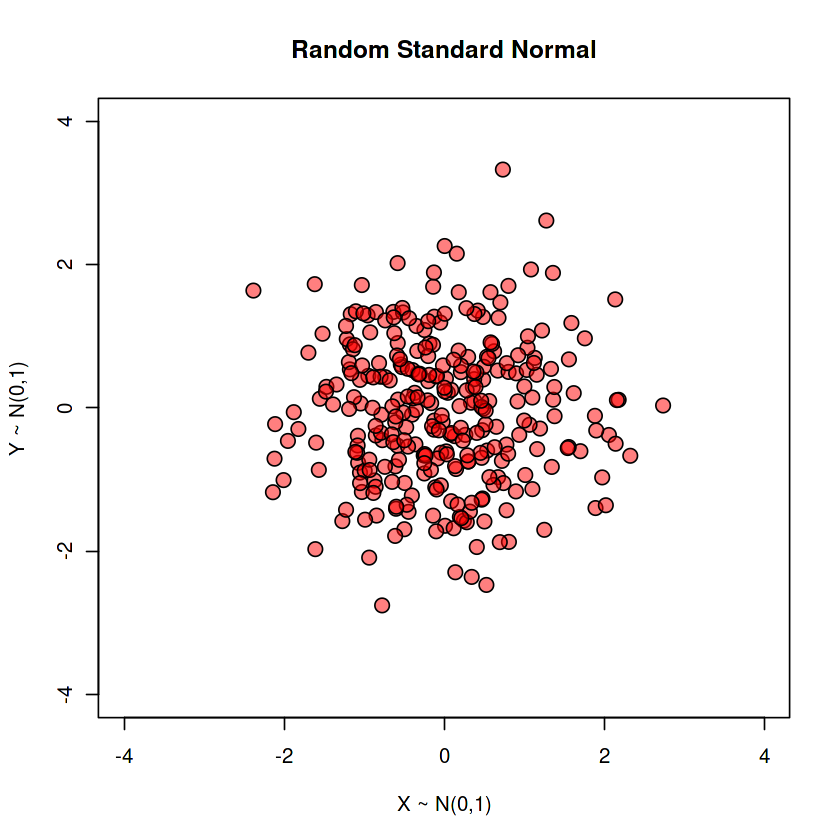

In [5]:
data <- matrix(rnorm(600), nrow = 2) # Random Gaussian data for plotting

plot(data[1,],                        # x axis data
     data[2,],                        # y axis data
     xlab = "X ~ N(0,1)",             # x axis label
     ylab = "Y ~ N(0,1)",             # y axis label
     main = "Random Standard Normal", # title
     xlim = c(-4,4),                  # limits of x axis
     ylim = c(-4,4),                  # limtis of y axis
     col = "black",                   # colour of point outline, default is black
     pch = 21,                        # point style, default is non-filled circle
     bg = adjustcolor("red",          # colour of point fill
                      alpha.f = 0.5), # point fill transparency
     cex = 1.5)                       # point size

Just as with using matplotlib, in R one can easily vectorize the parameters to distinguish between different groups in the data.

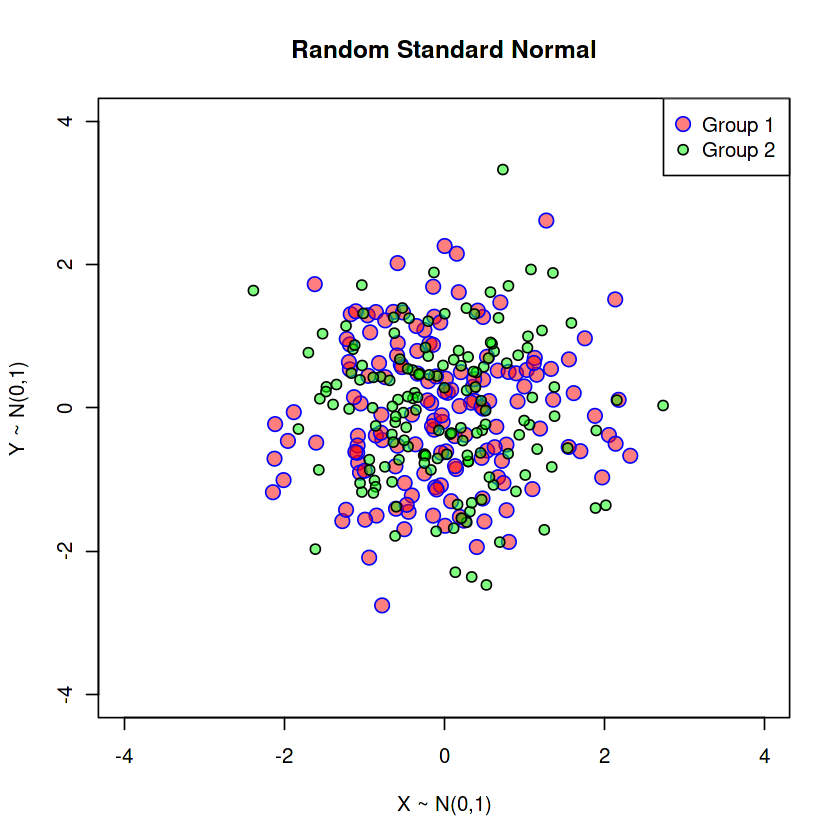

In [7]:
# Vectorize plotting parameters into two groups
colours <- adjustcolor(c(rep("red", 150), rep("green", 150)), alpha.f = 0.5)
edge_colours <- c(rep("blue", 150), rep("black", 150))
sizes <- c(rep(1.5, 150), rep(1, 150))

plot(data[1,], 
     data[2,],
     xlab = "X ~ N(0,1)",
     ylab = "Y ~ N(0,1)",
     main = "Random Standard Normal",
     xlim = c(-4,4),
     ylim = c(-4,4),
     col = edge_colours, # vectorized point edge colours, two groups
     pch = 21,
     bg = colours,       # vectorized point colours, two groups
     cex = sizes)        # vectorized point sizes, two groups

# display legend
legend("topright",                             # legend location
       legend = c("Group 1", "Group 2"),      # legend text
       col = c("blue", "black"),              # legend point edge colour
       pch = 21,                              # legend point style
       pt.cex = c(1.5,1),                     # legend point size
       pt.bg = adjustcolor(c("red", "green"), # legend point colour
                           alpha.f = 0.5))

The alternative to vectorizing parameters is to 'stack' plots on top of each other. This is done in R by first by calling the `plot()` function, then the `points()` function. Both of these calls operate the same but the `plot()` call will initialize the plotting space.  Calling `plot()` twice will produce two separate scatter plots.

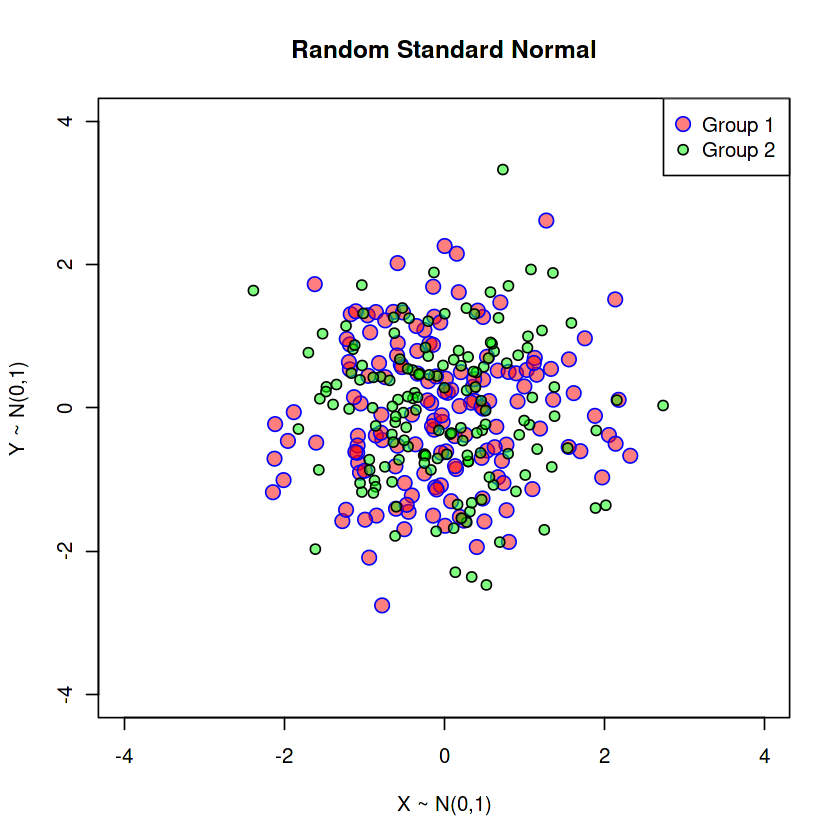

In [9]:
data_group1 <- data[,1:150]   # first group of data
data_group2 <- data[,151:300] # second group of data

plot(data_group1[1,], # plot first group
     data_group1[2,],       
     xlab = "X ~ N(0,1)",       
     ylab = "Y ~ N(0,1)",           
     main = "Random Standard Normal", 
     xlim = c(-4,4),                 
     ylim = c(-4,4),                 
     col = "blue",                
     pch = 21,
     cex = 1.5, 
     bg = adjustcolor("red",          
                      alpha.f = 0.5))

points(data_group2[1,], # stack second group of plotted points
     data_group2[2,],                   
     xlab = "X ~ N(0,1)",           
     ylab = "Y ~ N(0,1)",       
     main = "Random Standard Normal", 
     xlim = c(-4,4),              
     ylim = c(-4,4),               
     col = "black",            
     pch = 21,
     cex = 1, 
     bg = adjustcolor("green",
                      alpha.f = 0.5))

# display legend
legend("topright",                            # legend location
       legend = c("Group 1", "Group 2"),      # legend text
       col = c("blue", "black"),              # legend point edge colour
       pch = 21,                              # legend point style
       pt.cex = c(1.5,1),                     # legend point size
       pt.bg = adjustcolor(c("red", "green"), # legend point colour
                           alpha.f = 0.5))

One can observe that the two R methods produce virtually identical results.

## 7.4 - Histograms 
Histograms are great tools to approximate the distribution of numerical data. Typically they are created to represent frequency or "counts" of data which fall into specified ranges or they represent this information as a proportion or percentage. 

### 7.4.1 - Matplotlib Histograms 
Histograms can be created with the `hist()` function which also includes multiple plotting parameters. The type of histogram to draw is specified by the `histtype` parameter; `bar` is a traditional bar-type histogram. If multiple data are given the bars are arranged side by side. `barstacked` is a bar-type histogram where multiple data are stacked on top of each other. `step` generates a line plot that is by default unfilled and `stepfilled` generates a line plot that is by default filled. The `hist()` documentation page for matplotlib [[16]](#ref16) also notes that for large numbers of bins (>1000), `step` and `stepfilled` can be significantly faster than `bar` and `barstacked`.

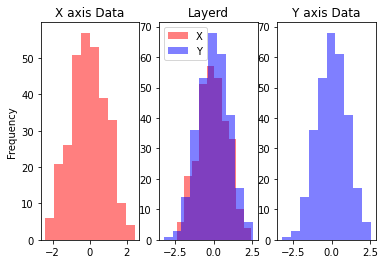

In [9]:
# First Plot
plt.subplot(1, 3, 1) # plot positon
plt.hist(data[0],                  # data
         density = False,          # displays frequencies instead of density, default is freq.
         color = "Red",            # box colour, default is blue
         alpha = 0.5,              # box transparency 
         orientation = "vertical", # plot orientation, default is vertical
         bins = 10)                # histogram bins, can be integer or sequence, default is 10
plt.title("X axis Data") # histogram title
plt.ylabel("Frequency")   # y axis label 

# Second plot using stacking
plt.subplot(1, 3, 2)
plt.hist(data[0],
         color = "Red", 
         alpha = 0.5,
         label = "X") # label for legend
plt.hist(data[1],
         alpha = 0.5,
         label = "Y", # label for legend
         color = "blue")
plt.title("Layered")
plt.legend()

# Last plot
plt.subplot(1, 3, 3)
plt.hist(data[1],
         alpha = 0.5,
         color = "blue")
plt.title("Y axis Data")

plt.show() # display 

The `hist()` function also allows for multi dimensional data to be stacked or grouped by setting the parameter `stacked` to `stacked=True` or `stacked=False`.

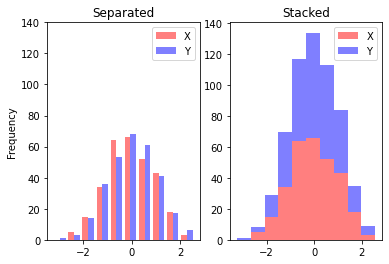

In [10]:
# first plot
plt.subplot(1, 2, 1)
plt.hist(data.T,                  # data
         color = ["red", "blue"], # colors for each dimenison
         alpha = 0.5,             # transparency 
         label = ["X", "Y"],      # labels for each dimension 
         stacked = False)         # separated and not stacked
plt.legend()
plt.ylim([0,140]) # so plots share same scale
plt.title("Separated")
plt.ylabel("Frequency")

# second plot
plt.subplot(1, 2, 2)
plt.hist(data.T,                  # data
         color = ["red", "blue"], # colors for each dimenison
         alpha = 0.5,             # transparency 
         label = ["X", "Y"],      # labels for each dimension 
         stacked = True)          # stacked not separated
plt.legend()
plt.title("Stacked")

# display
plt.show()

### 7.4.2 - R Histograms 
R has a built-in `hist()` function for displaying histograms. It should be noted that R's default is to plot the counts in the cells defined by equally spaced breaks. Thus the height of a rectangle is proportional to the number of points falling into the cell, as is the area, provided the breaks are equally-spaced. The default with non-equally spaced breaks is to give a plot of area one, in which the area of the rectangles is the fraction of the data points falling in the cells.

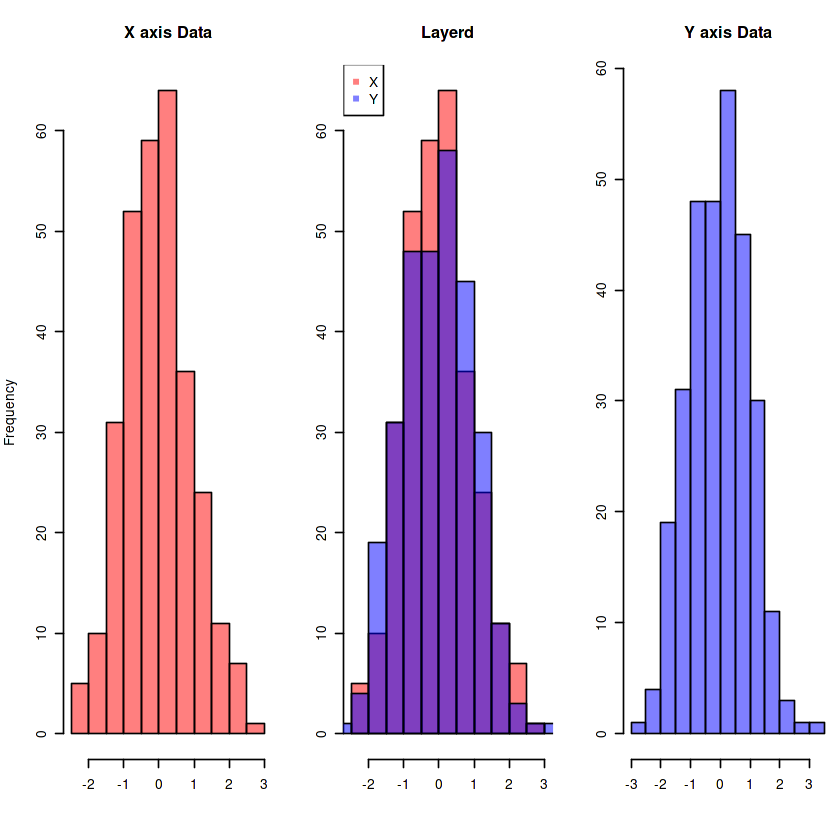

In [100]:
# set up plot layout
par(mfrow = c(1,3),            # three plots side by side
    mar = c(5.1, 4, 4.1, 0.5)) # spacing between plots

# first plot
hist(data[1,], 
     col = adjustcolor("red", 0.5), # box colour
     breaks = 12,                   # bin spacing, can be integer or sequence
     freq = TRUE,                   # frequencies and not density
     main = "X axis Data",          # title
     xlab ="")                      # remove x axis label

# second plot
hist(data[1,], 
     col = adjustcolor("red", 0.5),
     breaks = 12, 
     freq = TRUE,
     main = "Layerd",
     xlab ="",
     ylab = "")
# layer over top
hist(data[2,], 
     col = adjustcolor("blue", 0.5),
     breaks = 12, 
     freq = TRUE,
     xlab = "",
     ylab = "",
     add = T) # so plotting knows this is to be overlayed
# add legend to seccond plot
legend("topleft",legend = c("X", "Y"), 
       col = adjustcolor(c("red", "blue"), 0.5),
       pch = 15)

# last plot
hist(data[2,], 
     col = adjustcolor("blue", 0.5),
     breaks = 12, 
     freq = TRUE,
     main = "Y axis Data",
     xlab = "",
     ylab = "")

### 7.4.3 - R ggplot2 Histograms
For multi-dimensional data the ggplot2 `geom_bar()` and `geom_histograms()` calls are used to create the stacked and grouped histograms.

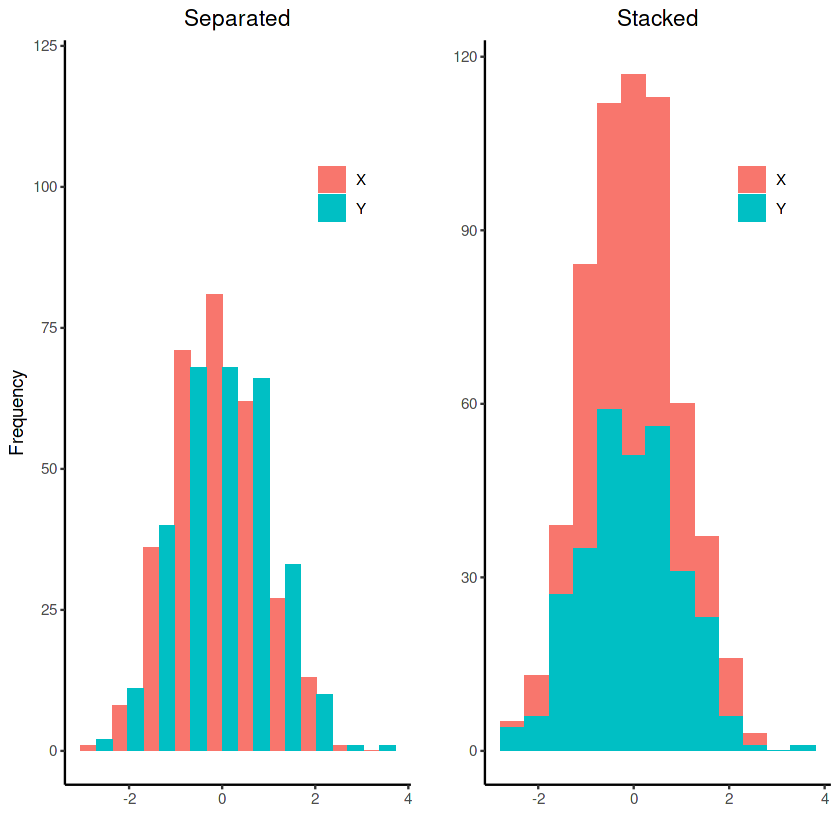

In [99]:
# move data into data frame object
df <- data.frame(d = c(data[1,], data[2,]),
                 group = c(rep("X", 300), rep("Y", 300)))
df2 <- data.frame(d = c(data[1,], data[2,], data[2,]),
                  group = c(rep("X", 600), rep("Y", 300)))

# first plot (separated)       
p <- ggplot(df, aes(d, fill = group)) +         # define plotting space and groups
  geom_histogram(position = "dodge", bins = 10) +                # define barplot and style                                     
  guides(fill = guide_legend(title = NULL)) +   # remove legend title
  ylim(0, 120) +                                # set y axis limits 
  theme_classic() +                             # set plotting theme, default background is grey grid
  xlab("") +                                    # remove x axis label
  ylab("Frequency") +                           # edit y axis label
  ggtitle("Separated") +                        # edit plot title
  theme(legend.position = c(0.8, 0.8)) +        # move postion of legend
  theme(plot.title = element_text(hjust = 0.5)) # move title to center of plot, default is left

# second plot
p2 <- ggplot(df2, aes(x = d, fill = group)) +      # define plotting space and groups
  geom_histogram(bins = 13, position="identity") + # define histogram bins and style
  theme_classic() +
  guides(fill=guide_legend(title=NULL)) +
  xlab("") +
  ylab("") +                                       # remove y axis lable
  ggtitle("Stacked") +                             # edit title
  theme(legend.position = c(0.8, 0.8)) +
  theme(plot.title = element_text(hjust = 0.5))

# display plots side by side
grid.arrange(p, p2, ncol = 2)

## 7.5 - Curves 
Plotting lines or curves is one of the easiest visualization concepts to understand. It is simply plotting sequences of one dimensional data arrays, similar to a scatter plot or plotting points, but the points are connected in order.
### 7.5.1 - Matplotlib Curves 
Curves can be plotted with Matplotlib function `plot()`. Many plotting arguments can be used inside such as the line style, line width, and colour.

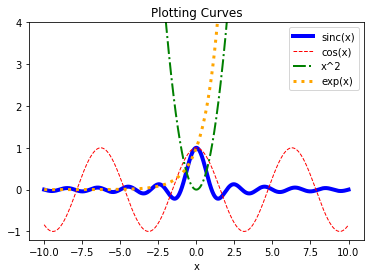

In [11]:
# data
domain = np.linspace(-10, 10, 1000) # x axis domain
function1 = np.sinc(domain)         # sinc function (sin(pi*x)/pi*x)
function2 = np.cos(domain)          # cosine function (cos(x))
function3 = domain ** 2             # quadratic function
function4 = np.exp(domain)          # exponential function

# Stack 4 curves on same plot
plt.plot(domain, function1, # data
         label = "sinc(x)", # lable for legend
         color = "blue",    # colour of curve (line)
         linestyle = "-",   # line style, many options to choose from, default is solid line "-"
         lw = 4)            # line width
plt.plot(domain, function2, 
         label = "cos(x)", 
         color = "red",     # if no color is specified Python will choose a unique one
         linestyle = "--",
         lw = 1)
plt.plot(domain, function3, 
         label = "x^2", 
         color = "green", 
         linestyle = "-.",
         lw = 2)
plt.plot(domain, function4, 
         label = "exp(x)", 
         color = "orange",
         linestyle = ":", 
         lw = 3)

# Display plot
plt.ylim([-1.2, 4])
plt.xlim([-11, 11])
plt.legend(loc = "upper right")
plt.xlabel("x")
plt.title("Plotting Curves")
plt.show()

Matplotlib also has a useful function `fill_between()` which allows one to fill space between curves. This can come in handy when displaying confidence intervals or data with variation.

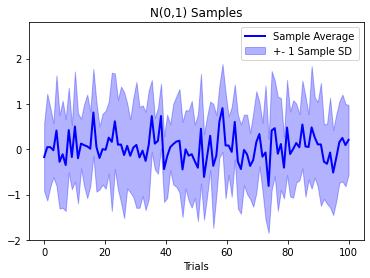

In [12]:
# 100 trials of 10 N(0,1) samples
trials = np.random.normal(size = (100,10))
avgs = np.mean(trials, axis = 1)
stds = np.std(trials, axis = 1)

plt.fill_between(np.linspace(0,100,100),   # domain space (x axis)
                 avgs-stds,                # upper limit of filled area
                 avgs+stds,                # lower limit of filled area
                 color = "blue",           # colour of filled space
                 alpha = 0.3,              # trasnparency of filled space
                 label = "+- 1 Sample SD") # label for legend 
plt.plot(np.linspace(0,100,100),  
         avgs,                     # average line 
         color = "blue", 
         lw = 2, 
         label = "Sample Average")

# Display plot
plt.xlabel("Trials")
plt.legend(loc = "upper right")
plt.ylim([-2, 2.8])
plt.title("N(0,1) Samples")
plt.show()

### 7.5.2 - R Curves 
The built-in R functions `plot()` and `points()` can be used to display curves by setting the `type` argument to `type = l` which is used for lines.

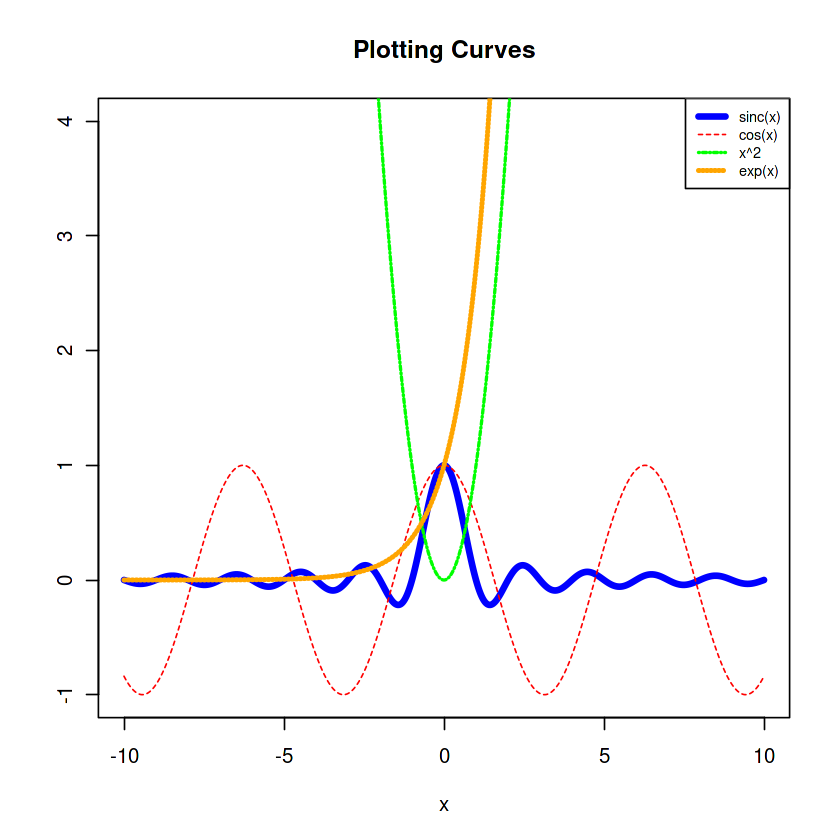

In [101]:
# data
domain <- seq(from = -10, to = 10, length = 1000) # x axis domain
func1 <- sin(pi * domain) / (pi * domain)         # sinc function
func2 <- cos(domain)                              # cosine function
func3 <- domain^2                                 # quadratic function
func4 <- exp(domain)                              # eponential function

# Stack 4 curves on same plot
plot(domain,                   # x axis data
     func1,                    # y axis data
     ylim = c(-1, 4),          # y axis range
     type = "l",               # plot type is line, default is points
     col = "blue",             # colour
     lwd = 4,                  # line width
     xlab = "x",               # x axis label
     ylab = "",                # y axis label
     main = "Plotting Curves") # title
points(domain,
       func2,
       type = "l",
       col = "red",
       lwd = 1,
       lty = "dashed") # line type, default is solid
points(domain,
       func3,
       type = "l",
       col = "green",
       lwd = 2,
       lty = "dotdash")
points(domain,
       func4,
       type = "l",
       col = "orange",
       lwd = 3,      
       lty = "dotted")          

# add legend to plot
legend("topright", 
       legend = c("sinc(x)", "cos(x)", "x^2", "exp(x)"), # legend text
       lty = c("solid", "dashed", "dotdash", "dotted"),  # legend lines
       col = c("blue","red", "green", "orange"),         # legend line colours
       lwd = c(4,1,2,3),                                 # legend line widths
       cex = 0.7)                                        # legend size, default is cex = 1

To replicate the results of the matplotlib function `fill_between()` in R, the polygon function can be used. The `polygon()` function will draw a polygons whose two sets of vertices are specified by two vectors, essentially acting the same way as the matplotlib `fill_between()`.

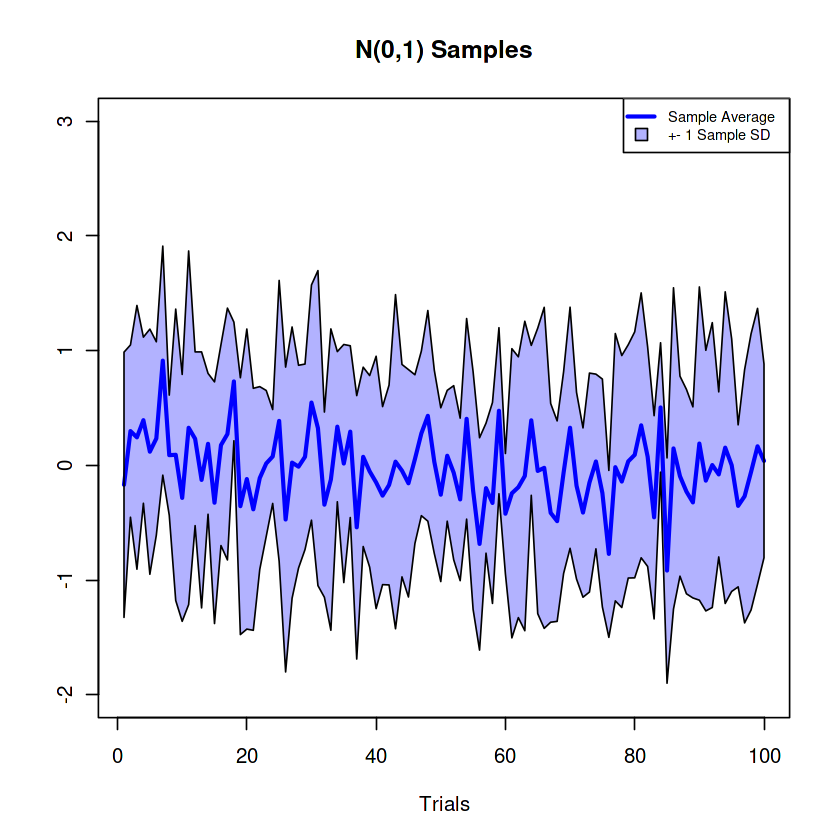

In [102]:
# 100 trials of 10 N(0,1) samples
trials <- matrix(rnorm(100*10), ncol = 10)
avgs <- rowMeans(trials)
sds <- apply(trials, 1, sd)

# plot avergae line
plot(1:100, avgs, 
     col = "blue", 
     type = "l",
     lwd = 2.5,
     ylim = c(-2,3),
     ylab = "",
     xlab = "Trials",
     main = "N(0,1) Samples")

# add +- 1 standard devation to plot
polygon(c(1:100,rev(1:100)),            # x axis of shading area
        c(avgs + sds, rev(avgs - sds)), # top and bottom of shading area 
        col = adjustcolor("blue", 0.3)) # shading colour

# legend
legend("topright",
       legend = c("Sample Average", "+- 1 Sample SD"),
       lty = c("solid", NA), # use NA when not using a vectorized parameter
       lwd = c(2.5, NA),
       col = c("blue", "black"),
       pch = c(NA, 22),
       cex = 0.7,
       pt.bg = c("blue", adjustcolor("blue", 0.3)),
       pt.cex = c(1, 1.5))

## 7.6 - Images and Array (Field) Plots 
Images can be thought of as grid spaces in which each grid point acts as a "pixel" with its own "pixel value" or pixel colour. Arbitrary grid spaces can be defined with functions which define the pixel value. These are known as field plots.
### 7.6.1 - Matplotlib Images and Field Plots 
To define a domain for field plots we make use of the NumPy function `meshgrid()`. This allows creation of a grid space in the (x,y) space and evaluation of functions of the form f(x,y) over this grid space. One can make use of the `imshow()` function to display the results of an evaluation over this grid space. Many options are available inside the `imshow()` function which can alter the visualization.

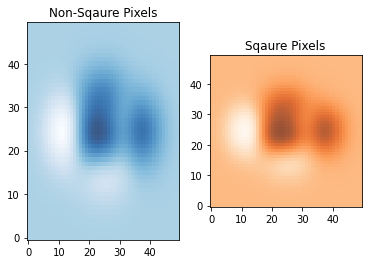

In [13]:
# Data
x,y = np.meshgrid(np.linspace(-3, 3, 50), # grid space on x axis, 50 "blocks" between -3 and 3
                  np.linspace(-3, 3, 50)) # grid space on y axis, 50 "blocks" between -3 and 3
z = (1 - x/2 + x**5 + y**3) * np.exp(-x**2 - y**2) # evaluation over grid space

# First plot
plt.subplot(1, 2, 1)
plt.imshow(z,                # data
           cmap = "Blues",   # colour map, many options availible default is "viridis"
           aspect = "auto",  # adjust pixel size, default is "equal" with all pixels same square size
           origin = "lower", # location of origin [0,0], default is "upper" top left corner
           alpha = 0.8)      # adjust transparency
plt.title("Non-Sqaure Pixels")

# Second plot
plt.subplot(1, 2, 2)
plt.imshow(z,                
           cmap = "Oranges", # new colour mapping
           aspect = "equal", # all pixels same square size
           origin = "lower", 
           alpha = 0.8)
plt.title("Sqaure Pixels")

plt.show() # display plots nicely

The `imshow()` function can also be used in a layering technique where one can "stack" or "layer" image plots over one another. Here we must use the `alpha` parameter which changes the transparency of the displayed images; otherwise, one will see only the top layer, or top image.

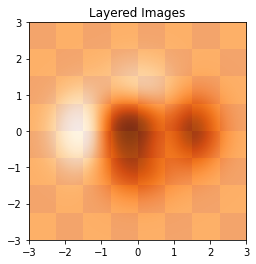

In [14]:
Z1 = np.add.outer(range(8), range(8)) % 2          # background image (8x8 sqaures)
edges = np.min(x), np.max(x), np.min(y), np.max(y) # set layered images on same axis

# First image
plt.imshow(Z1, 
           interpolation = 'nearest', # interpolation method used, default is 'antialiased'
           extent = edges,            # bounding box that the image will fill, default is based on origin location
           alpha = 0.5)

# Second image overlayed
plt.imshow(z, 
           cmap = 'Oranges', 
           alpha = 0.9, 
           interpolation = 'bilinear',
           extent = edges)
plt.title("Layered Images")

# display
plt.show()

Within matplotlib's image tools one can make use of the `imread()` function to import images into memory. Images can be stored in a red-green-blue (RGB) format where pixels are split into three channels of values in the red, green and blue colours.

In [3]:
img = mpimg.imread('map.jpeg')

This imported image has three channels of pixels stored as values in three matrices of size 934 by 1600. These channels can be accessed by indexing the image's third location, the first being the red channel, second being the green, and last being the blue. The channels can then be extracted from the image and individually plotted.

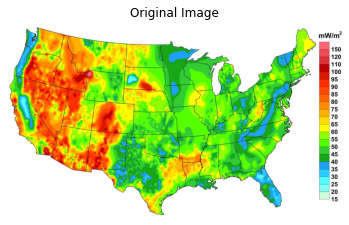

In [20]:
plt.imshow(img)             # plot original RGB image            
plt.title("Original Image")
plt.axis('off')             # removes axis numbers, no "ticks"
plt.show()

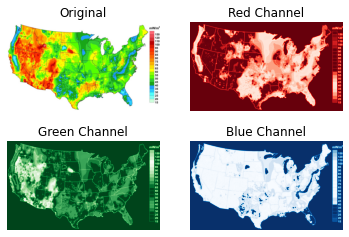

In [21]:
red_channel = img[:,:,0]   # extract red channel 
green_channel = img[:,:,1] # extract green channel 
blue_channel = img[:,:,2]  # extract blue channel 

# original plot
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

# red channel plot
plt.subplot(2, 2, 2)
plt.imshow(red_channel, cmap = "Reds")
plt.title("Red Channel")
plt.axis('off')

# green channel plot
plt.subplot(2, 2, 3)
plt.imshow(green_channel, cmap = "Greens")
plt.title("Green Channel")
plt.axis('off')

# blue channel plot
plt.subplot(2, 2, 4)
plt.imshow(blue_channel, cmap = "Blues")
plt.title("Blue Channel")
plt.axis('off')

# display
plt.show()

### 7.6.2 - R Images and Field Plots 
The R `image()` function is used to create field plots identical to those produced in Python with matplotlib. One can use the `meshgrid` function from the R pracma package [[10]](#ref10) to create a grid space.

In [1]:
library(pracma)

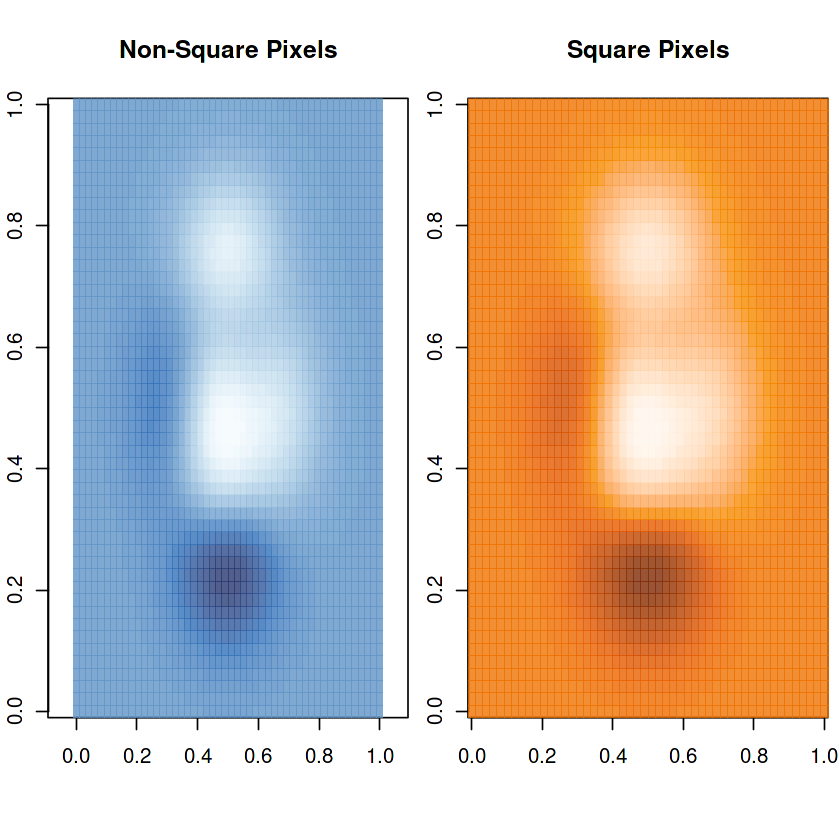

In [105]:
# Data
ticks <- seq(from = -3, to = 3, length = 50) # grids "ticks"
grid <- meshgrid(ticks, y = ticks)           # grid with 50 points between -3 and 3 on both axis
X <- grid$X
Y <- grid$Y
z <- (1 - X/2 + X^5 + Y^3) * exp(-X^2 - Y^2) # evaluate on grid space

# Display side by side
par(mfrow = c(1,2),
    mar = c(5.1, 2, 4.1, 0.5)) # adjust margins

# First plot
image(z = z,
      main = "Non-Square Pixels",                           # title
      col = hcl.colors(50, palette = "Blues", alpha = 0.8), # colour mapping
      asp = 2)                                              # chnage pixel size, default is square asp = 1
# Second plot
image(z = z,
      main = "Square Pixels",
      col = hcl.colors(50, palette = "Oranges", alpha = 0.8)) # new colour mapping

A layering technique is used to "stack" or "layer" image plots over one another. Here the `alpha` parameters of the layered images are set to produce a blended image.

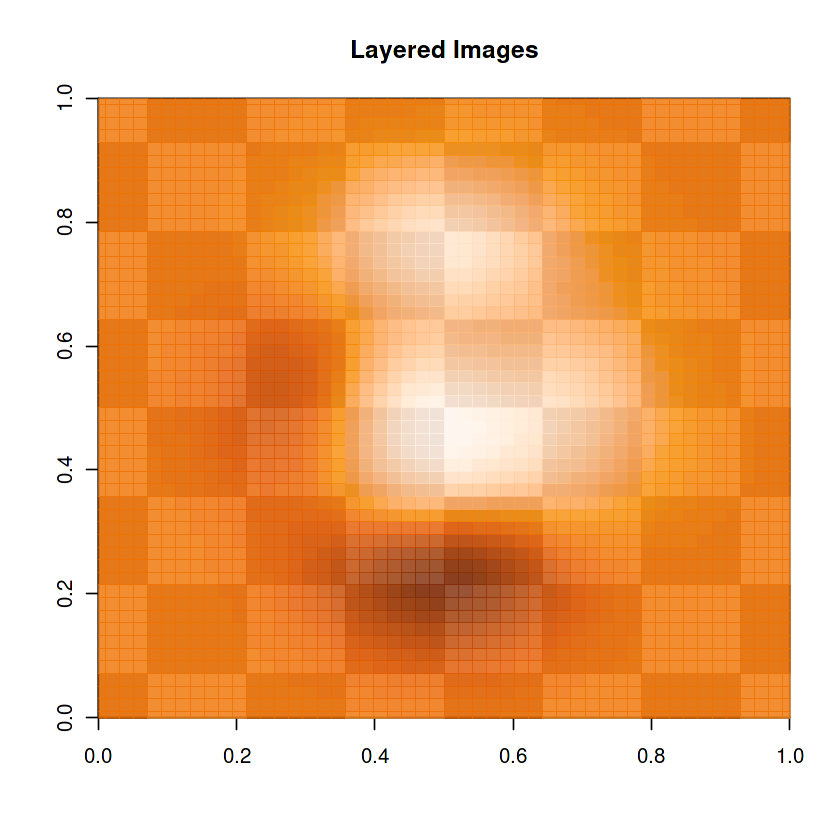

In [106]:
par(mfrow = c(1,1)) # display one plot

# first image
checkers <- matrix(rep(c(rep(c(0,1),4), rep(c(1,0), 4)), 4), ncol = 8) # "checkers"
image(z = checkers,
      main = "Layered Images",
      col = hcl.colors(50, palette = "Oranges", alpha = 0.5),
      xlim = c(0,1),                                          # limits of image x axis 
      ylim = c(0,1))                                          # limits of image y axis

# second image
image(z = z,
      col = hcl.colors(50, palette = "Oranges", alpha = 0.8),
      add = T) # add image over top


### 7.6.3 - R jpeg Package
For tasks such as loading images into R we make use of the jpeg package. As per the jpeg documentation page [[17] jpeg: Read and Write JPEG images](#ref17) "This package provides an easy and simple way to read, write and display bitmap images stored in the JPEG format. It can read and write both files and in-memory raw vectors." We use the `rasterImage()` function to draw a raster image at specified locations and sizes and the `readJPEG()` function to read in the jpeg image from memory.   

Just as with all R packages, it can be loaded with the call `library(jpeg)` and installed if needed with the call `install.packages(jpeg)`. It should be noted that version 0.1.8.1 of jpeg is being used.

In [4]:
library(jpeg)               # For reading images into memory
img <- readJPEG("map.jpeg") # get image
packageVersion("jpeg")

[1] ‘0.1.8.1’

The original image is displayed and one can extract its red, blue and green channels.

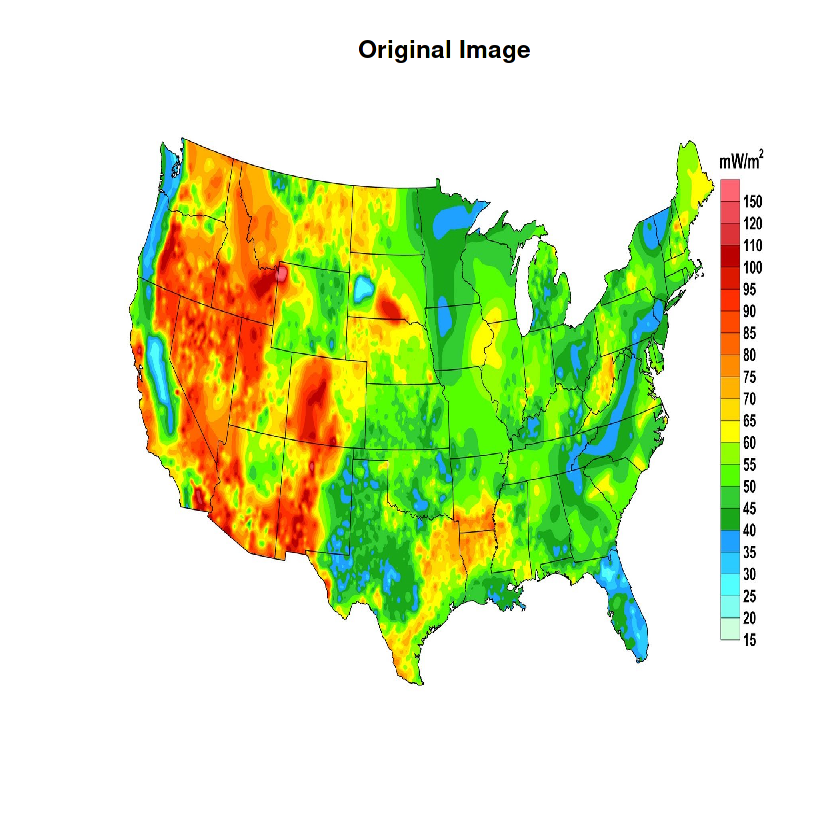

In [109]:
# plot original RGB image
plot.new()
rasterImage(img,                 # data
            xleft = 0,           # plotting regions
            xright = 1, 
            ytop = 1, 
            ybottom = 0, 
            interpolate = FALSE) # no interpolation when drawing
title(paste0("Original Image"))  # add title to image

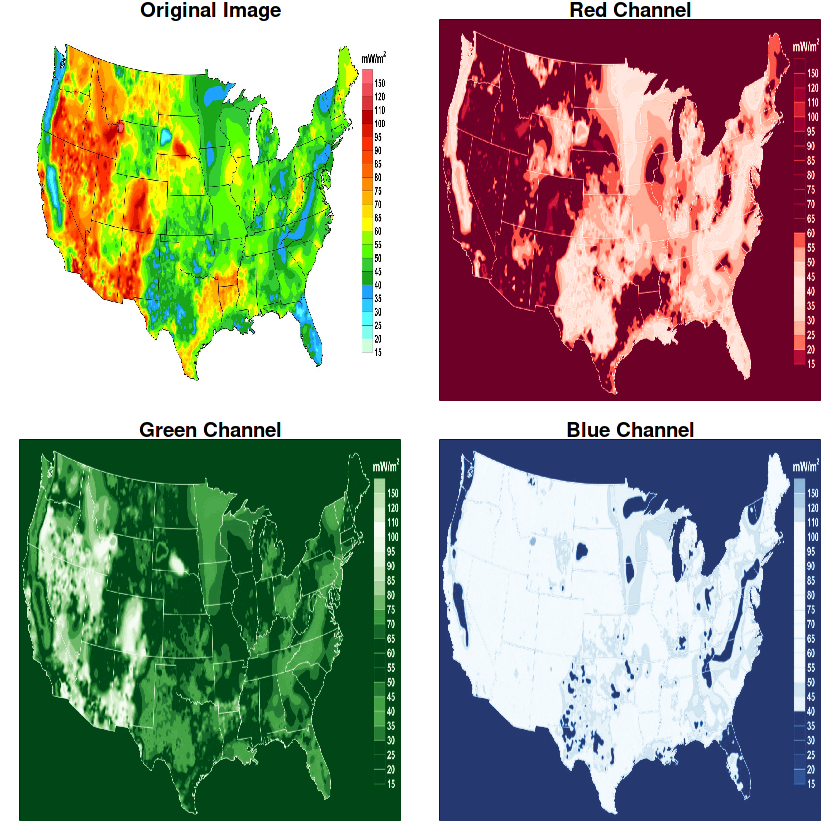

In [111]:
# Display 4 plots
par(mfrow = c(2,2), mar = c(1,1,1,1))

# original 
plot.new()
rasterImage(img, 
            xleft = 0, 
            xright = 1, 
            ytop = 1, 
            ybottom = 0, 
            interpolate = FALSE) 
title(paste0("Original Image"))

# Get RBG channels 
r <- img[,,1]
g <- img[,,2]
b <- img[,,3]

# Red channel
image(t(r[nrow(r):1,]), 
      col = hcl.colors(50, palette = "Reds", alpha = 0.5, rev = T),
      main = "Red Channel",
      xaxt = "n", # remove axis
      yaxt = "n")

# Green channel
image(t(g[nrow(g):1,]), 
      col = hcl.colors(50, palette = "Greens", alpha = 0.5, rev = T),
      main = "Green Channel",
      xaxt = "n",
      yaxt = "n")

# blue channel
image(t(b[nrow(b):1,]), 
      col = hcl.colors(50, palette = "Blues", alpha = 0.5, rev = T),
      main = "Blue Channel",
      xaxt = "n",
      yaxt = "n")

## 7.7 - 3D Visualizations
3D visualizations are a direct extension from 2D visualizations with the addition of an additional axis. Because we live in a three dimensional reality, these types of plots may better represent physical or real world spatial data.
### 7.7.1 - Matplotlib 3D Visualizations 
One can make use of the `axes()`, `plot3D()` and `scatter3D()` tools within matplotlib's pyplot toolbox. It is very easy to use and similar to 2D plotting, with the addition of the third z axis.

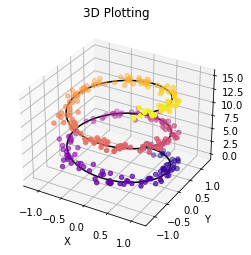

In [15]:
# lay out 3d plotting space
fig = plt.axes(projection='3d')

# create 3D curve (line)
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)

# plot 3D curve (line)
fig.plot3D(xline, yline, zline, 'black')

# create 3D data points
zdata = 15 * np.random.random(300)
xdata = np.sin(zdata) + 0.1 * np.random.randn(300)
ydata = np.cos(zdata) + 0.1 * np.random.randn(300)

# plot 3D data points over line
fig.scatter3D(xdata, ydata, zdata, c=zdata, cmap = 'plasma')

# display
plt.title("3D Plotting")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

One can also create very nice contour plots with the `contour3D()` function, wireframe plots with the `plot_wireframe()` function, and surface plots with the `plot_surface()` function. Other options exist within the pylot toolbox and can be used in a very similar way.

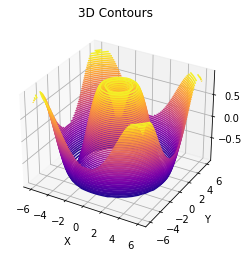

In [16]:
# data
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X ** 2 + Y ** 2))

# contours
fig = plt.axes(projection='3d')
fig.contour3D(X, Y, Z, 
              50, 
              cmap='plasma')

# display
plt.title("3D Contours")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

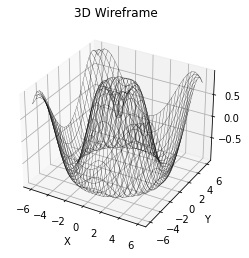

In [17]:
# wireframe plot
fig = plt.axes(projection='3d')
fig.plot_wireframe(X, Y, Z, 
                   color='black', 
                   alpha = 0.8, 
                   linewidth=0.3)

# display
plt.title("3D Wireframe")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

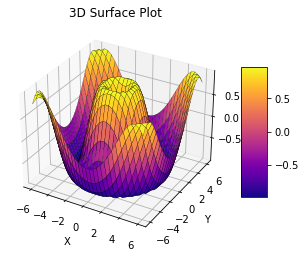

In [18]:
# surface plot
fig2 = plt.axes(projection='3d')
s = fig2.plot_surface(X, Y, Z, 
                      rstride=1, 
                      cstride=1,
                      cmap='plasma', 
                      edgecolor='black', 
                      linewidth=0.2)
# Display
plt.title("3D Surface Plot")
plt.xlabel("X")
plt.ylabel("Y")
plt.colorbar(s, shrink = 0.6, aspect = 5) # add colour bar if desired
plt.show()

### 7.7.2 - R 3D Visualizations with plot3D Package
As per the plot3D documentation page [[18] plot3D: Plotting Multi-Dimensional Data](#ref18) the package "provides many functions for viewing 2-D and 3-D data, including perspective plots, slice plots, surface plots and scatter plots." It should be noted that many of the functions are extensions of R’s `persp()` or `image()` function. Here we use the functions `lines3D`, `scatter3D` and `contour3D` from the plot3D package.   

The package can be loaded into R using the call `library(plot3D)` if already installed. If not installed one can download a version using the call `install.packages(plot3D)`. It should be noted that version 1.3 of plot3D is being used.

In [5]:
library(plot3D) # 3D plotting package
packageVersion("plot3D")

[1] ‘1.3’

The `scatter3D()` function is used to create a scatter of points in 3D while the `lines3D()` function is used here to draw the 3D line.

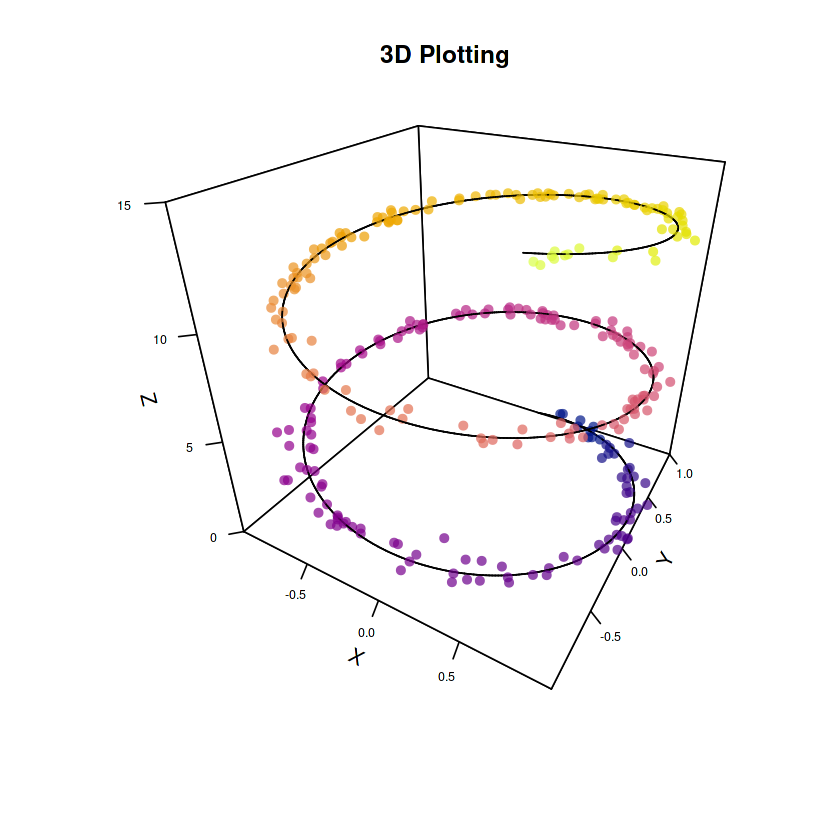

In [113]:
colours <- hcl.colors(100,palette = "plasma") # plasma colour scheme

# create 3D curve (line)
zline <- seq(0, 15, length.out = 1000)
xline <- sin(zline)
yline <- cos(zline)

# plot 3D curve (line)
lines3D(x = xline, y = yline, z = zline, # data
        col = "black",                   # line colour
        theta = 30,                      # 3D viewing perspective
        phi = 30,                        # 3D viewing perspective
        ticktype = 'detailed',           # add axis ticks
        xlab = "X",        
        ylab = "Y",
        zlab = "Z",
        cex.axis = 0.6,                  # axis numbers font size
        main = '3D Plotting')

# create 3D data points
set.seed(10)                               # reproduce same data
zdata <- 15*runif(300)                     # z axis
xdata <- sin(zdata) + 0.05*rnorm(300)      # x axis
ydata <- cos(zdata) + 0.05*rnorm(300)      # y axis

# plot 3D data points over line
scatter3D(x = xdata, y = ydata, z = zdata,           # data
          colkey = FALSE,                            # remove colour bar
          theta = 30,                 
          phi = 30,                       
          ticktype = 'detailed',
          xlab = "X",
          ylab = "Y",
          zlab = "Z",
          cex.axis = 0.6,
          add = TRUE,                                # add over existing line plot
          pch = 16,                                  # point style (filled circles)
          col = adjustcolor(colours, alpha.f = 0.7)) # transparency of points

For a 3D contour plot the `contour3D()` function is used.

In [114]:
# function to create z space
f <- function(x, y){
  sin(sqrt(x^2 + y^2))
}
# data
x <- y <- seq(-6, 6, length = 30) # x and y axis same
z <- outer(x, y, f)               # evaluation

# contours
contour3D(x = x, y = y, z = z,   # data
          colvar = z,            # countours based on z axis
          nlevels = 80,          # number of contour lines
          col = colours,         # contour colours
          theta = 30,
          phi = 30,
          ticktype = 'detailed',
          xlab = "X",
          ylab = "Y",
          zlab = "Z",
          cex.axis = 0.6,
          main = "3D Contours",
          colkey = FALSE)        # remove colour bar

The `persp()` function is used here to create both a wireframe plot and a surface plot. The only difference is how the `color` parameter is specified, in the wireframe plot the colour is set to `NA` while in the surface plot a plasma colour scheme is used. Note that `persp()` is actually a built-in R function and does not need any external packages in order to be used.

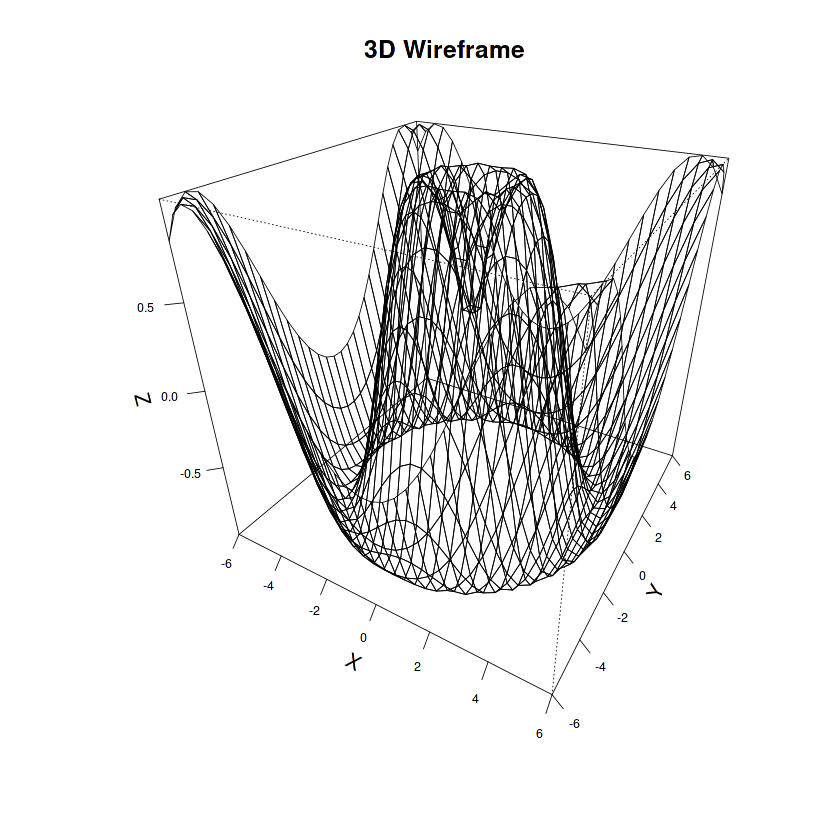

In [115]:
# wireframe plot
persp(x, y, z,               # data
      main = "3D Wireframe",
      theta = 30,
      phi = 30,
      border = "black",      # colour of lines
      box = T,               # include box around plot
      ticktype = 'detailed',
      xlab = "X",
      ylab = "Y",
      zlab = "Z",
      col = NA,              # no colour between wire lines
      lwd = 0.5,             # line thickness
      cex.axis = 0.6)

In [116]:
# colour tool to fill the surfaces of plot
zfacet <- (z[-1, -1] + z[-1, -ncol(z)] + z[-nrow(z), -1] + z[-nrow(z), -ncol(z)])/4
facetcol <- cut(zfacet, 100)

# surface plot
persp(x, y, z,                  # data
      main = "3D Surface Plot",
      theta = 30,
      phi = 30,
      border = "black",
      box = T,
      ticktype = 'detailed',
      xlab = "X",
      ylab = "Y",
      zlab = "Z",
      col = colours[facetcol],  # colour between lines based on colour tool
      lwd = 0.5,
      cex.axis = 0.6)

#   
#   
#   
***
***
[10] Hans W. Borchers, 2022, Package 'pracma' (Practical Numerical Math Functions), [[link]](https://CRAN.R-project.org/package=pracma)   <a class="anchor" id="ref10"></a>    
[14] H. Wickham, 2016. ggplot2: Elegant Graphics for Data Analysis, [[link]](https://ggplot2.tidyverse.org)   <a class="anchor" id="ref14"></a>  
[15] Baptiste Auguie, Anton Antonov, 2017. gridExtra: Miscellaneous Functions for "Grid" Graphics, [[link]](https://CRAN.R-project.org/package=gridExtra) <a class="anchor" id="ref15"></a>  
[16] J. D. Hunter, 2007. Matplotlib: A 2D Graphics Environment, [[link]](https://matplotlib.org/)   <a class="anchor" id="ref16"></a>    
[17] Simon Urbanek, 2019. jpeg: Read and Write JPEG images, [[link]](https://CRAN.R-project.org/package=jpeg)   <a class="anchor" id="ref17"></a>    
[18] Karline Soetaert, 2019. plot3D: Plotting Multi-Dimensional Data, [[link]](https://CRAN.R-project.org/package=plot3D)   <a class="anchor" id="ref18"></a>       